In [181]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [182]:
train =pd.read_csv("dataset\Bigmart\Train.csv")

In [183]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [184]:
train.shape

(8523, 12)

In [185]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [186]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [187]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [188]:
train["Outlet_Age"]=2021-train["Outlet_Establishment_Year"]

In [189]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,12
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,34
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,36
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,19
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,14


In [190]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [191]:
 train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,23.168133
std,4.643456,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,12.000000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,17.000000
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,22.000000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,34.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,36.000000


In [192]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [193]:
train["Outlet_Size"].mode()[0]

'Medium'

In [194]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [195]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())

<AxesSubplot:>

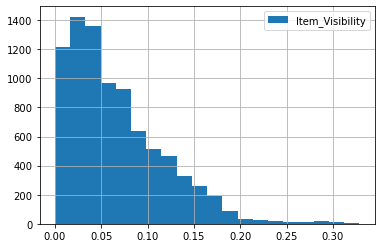

In [196]:
train["Item_Visibility"].hist(bins=20,legend=True)

In [197]:
Q1 =train["Item_Visibility"].quantile(0.25)
Q3 =train["Item_Visibility"].quantile(0.75)
IQR=Q3-Q1
filt_train=train.query('(@Q1-1.5*@IQR) <= Item_Visibility <=(@Q3 + 1.5* @IQR)')


In [198]:
train["Item_Visibility"].quantile(0.75)

0.0945852925

In [199]:
filt_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


In [200]:
filt_train.shape,train.shape

((8379, 13), (8523, 13))

In [201]:
train = filt_train
train.shape

(8379, 13)

In [202]:
train["Item_Visibility_bins"]=pd.cut(train['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=["Low Viz","Viz","High"])

In [203]:
train["Item_Visibility_bins"].value_counts()

Low Viz    4403
Viz        2557
High        893
Name: Item_Visibility_bins, dtype: int64

In [204]:
train["Item_Visibility_bins"]=train["Item_Visibility_bins"].fillna("Low Viz")

In [205]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(["Low fat","LF"],"Low Fat")

In [206]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace("reg","Regular")

In [207]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,Low Viz
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,Low Viz
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,Low Viz
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23,Low Viz
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,Low Viz
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,12,Low Viz
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,34,Low Viz
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,36,Viz
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,19,Low Viz
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,14,Viz


In [208]:
le=LabelEncoder()

In [209]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [210]:
train["Item_Fat_Content"]=le.fit_transform(train["Item_Fat_Content"])

In [211]:
train["Item_Visibility_bins"]=le.fit_transform(train["Item_Visibility_bins"])

In [212]:
train["Outlet_Size"]=le.fit_transform(train["Outlet_Size"])

In [213]:
train["Outlet_Location_Type"]=le.fit_transform(train["Outlet_Location_Type"])

In [214]:
dummy= pd.get_dummies(train["Outlet_Type"])
dummy.head(10)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,1,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [215]:
train=pd.concat([train,dummy],axis=1)

In [216]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int32
Grocery Store                  uint8
Supermarket Type1              uint8
Supermarket Type2              uint8
Supermarket Type3              uint8
dtype: object

In [217]:
train=train.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Type","Outlet_Establishment_Year"],axis=1)

In [218]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [219]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,22,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,12,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,22,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,23,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,34,1,0,1,0,0


In [220]:
X=train.drop("Item_Outlet_Sales",axis=1)
y=train.Item_Outlet_Sales

In [221]:
test=pd.read_csv("dataset\Bigmart\Train.csv")

In [222]:
test["Outlet_Size"]=test["Outlet_Size"].fillna("Medium")

In [223]:
test["Item_Visibility_bins"]=pd.cut(test['Item_Visibility'],[0.000,0.065,0.13,0.2],labels=["Low Viz","Viz","High"])

In [224]:
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [225]:
test["Item_Visibility_bins"]=test["Item_Visibility_bins"].fillna("Low Viz")

In [226]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_bins
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Viz
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Viz
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Viz
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Low Viz
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Viz
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,Low Viz
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,Low Viz
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,Viz
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,Low Viz
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,Viz


In [227]:
test["Item_Fat_Content"]=le.fit_transform(test["Item_Fat_Content"])

In [228]:
test["Item_Visibility_bins"]=le.fit_transform(test["Item_Visibility_bins"])

In [229]:
test["Outlet_Size"]=le.fit_transform(test["Outlet_Size"])

In [230]:
test["Outlet_Location_Type"]=le.fit_transform(test["Outlet_Location_Type"])

In [231]:
dummy =pd.get_dummies(test["Outlet_Type"])
test=pd.concat([test,dummy],axis=1)

In [232]:
X_test=test.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Type","Outlet_Establishment_Year"],axis=1)

In [233]:
X.columns,X_test.columns

(Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'),
 Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
        'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
        'Item_Visibility_bins', 'Grocery Store', 'Supermarket Type1',
        'Supermarket Type2', 'Supermarket Type3'],
       dtype='object'))

In [234]:
from sklearn import model_selection

In [239]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

In [240]:
lin=LinearRegression()

In [242]:
lin.fit(xtrain,ytrain)
print(lin.coef_)
print(lin.intercept_)

[    3.32820985    26.01366458  -193.57463691    15.96723032
    16.76915553     7.9492351     -2.30274404    17.50198205
 -1753.81236453   219.13538259  -122.45808569  1657.13506762]
-186.497710919989


In [243]:
predictions=lin.predict(xtest)

In [245]:
print(sqrt(mean_squared_error(ytest,predictions)))

1118.4200156058166


In [248]:
from sklearn.linear_model import Ridge
ridgereg =Ridge(alpha=0.001,normalize=True)
ridgereg.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain,ridgereg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,ridgereg.predict(xtest))))
print("R2 Value/Coefficient of determination: {}".format(ridgereg.score(xtest,ytest)))


1139.5265729685175
1118.3636046670542
R2 Value/Coefficient of determination: 0.5486563374937858


In [249]:
from sklearn.linear_model import Lasso

lassoreg =Lasso(alpha=0.001,normalize=True)
lassoreg.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain,lassoreg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,lassoreg.predict(xtest))))
print("R2 Value/Coefficient of determination: {}".format(lassoreg.score(xtest,ytest)))

1139.5259116268187
1118.4134555067083
R2 Value/Coefficient of determination: 0.5486160994854709


In [250]:
from sklearn.linear_model import ElasticNet

Elas =Lasso(alpha=0.001,normalize=True)
Elas.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain,Elas.predict(xtrain))))
print(sqrt(mean_squared_error(ytest,Elas.predict(xtest))))
print("R2 Value/Coefficient of determination: {}".format(Elas.score(xtest,ytest)))

1139.5259116268187
1118.4134555067083
R2 Value/Coefficient of determination: 0.5486160994854709
